In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
#Load the dataset
dfcredit = pd.read_csv(r"C:\Users\Anusree\Downloads\final_data.csv")

In [3]:
#Display some sample result
dfcredit.sample(5)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
19121,2020-12-07 22:52:47,30518196150127,fraud_Powlowski-Weimann,food_dining,117.49,Karen,Sullivan,F,6313 Scott Trace,Rossville,...,40.3625,-87.6692,1807,"Buyer, retail",1975-06-02,5ab53aa6c005346abbf91b4c0dd68ff2,1386456767,39.386543,-87.650837,1
4382,2020-12-15 16:24:35,2283743876903625,fraud_Thiel PLC,misc_pos,4.29,Shannon,Williams,F,9345 Spencer Junctions Suite 183,Alpharetta,...,34.0770,-84.3033,165556,Prison officer,1997-12-27,30a0933093c757ce5aa10aa8821fba39,1387124675,34.548332,-83.664487,0
11745,2019-05-18 02:17:59,3518758680062249,fraud_Hudson-Ratke,grocery_pos,283.21,Antonio,Koch,M,8738 Richard Brooks,Moab,...,38.5677,-109.5271,9772,Location manager,1989-11-24,26be3fc793738f93a5b98cdec937f3d8,1337307479,37.870377,-110.193522,1
9644,2020-12-02 00:04:02,4769426683924058915,"fraud_Schaefer, McGlynn and Bosco",gas_transport,48.32,Andrea,Cruz,F,26572 Hodge Villages Suite 512,Mifflin,...,40.5553,-77.4001,1909,Mining engineer,1954-08-22,75b9d1b84a225286689b19e964251d07,1385942642,40.264776,-77.317657,0
9303,2019-07-23 22:43:18,4922710831011201,fraud_Conroy-Emard,food_dining,79.73,Heather,Chase,F,6888 Hicks Stream Suite 954,Manor,...,40.3359,-79.6607,1472,Public affairs consultant,1941-03-07,37e6a1c41921b27ee7a185c63b923ff6,1343083398,40.664897,-80.615284,0


In [4]:
#Summary statistics of numeric columns
dfcredit.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.930200e+04,19302.000000,19302.000000,19302.000000,19302.000000,1.930200e+04,1.930200e+04,19302.000000,19302.000000,19302.000000
mean,4.031783e+17,299.401286,48786.681795,38.612140,-90.344563,8.894424e+04,1.357049e+09,38.608007,-90.346885,0.500000
std,1.286824e+18,375.672619,27049.760036,5.126584,14.091762,3.018630e+05,1.818274e+07,5.164622,14.107188,0.500013
min,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.325385e+09,19.161782,-166.558056,0.000000
25%,1.800206e+14,20.350000,26041.000000,34.778900,-96.809400,7.600000e+02,1.341477e+09,34.880532,-96.951472,0.000000
50%,3.522829e+15,88.015000,48043.000000,39.390000,-87.591700,2.526000e+03,1.356362e+09,39.411563,-87.493075,0.500000
75%,4.634956e+15,479.595000,72011.000000,42.015800,-80.162900,1.968500e+04,1.372561e+09,41.991320,-80.237604,1.000000
max,4.992346e+18,7508.460000,99921.000000,66.693300,-67.950300,2.906700e+06,1.388533e+09,67.510267,-66.960745,1.000000


In [5]:
#Identifing the null value
dfcredit.isnull().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

### Top 5 Cities with Most Fraudulent Transactions

In [23]:
# Filter for fraudulent transactions
fraud_data = dfcredit[dfcredit['is_fraud'] == 1]

In [24]:
# Group by city and count the number of fraudulent transactions
city_fraud_counts = fraud_data['city'].value_counts()

In [27]:
city_fraud_counts

Dallas           39
Houston          39
Birmingham       36
New York City    35
Allentown        34
                 ..
Kilgore           2
Laramie           2
Phenix City       2
Littleton         2
Sherman           2
Name: city, Length: 887, dtype: int64

In [25]:
# Get the top 5 cities with the most fraudulent transactions
top_5_cities = city_fraud_counts.head(5)

In [26]:
top_5_cities

Dallas           39
Houston          39
Birmingham       36
New York City    35
Allentown        34
Name: city, dtype: int64

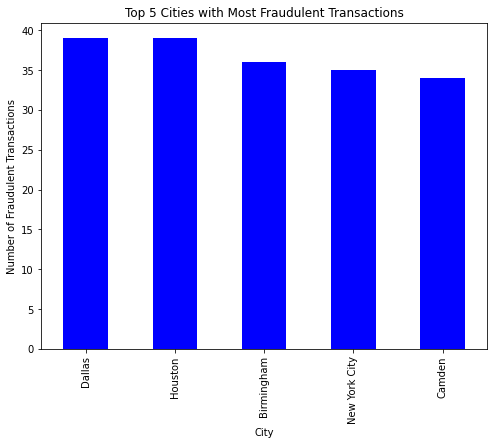

In [28]:
# Plot the results
top_5_cities.plot(kind='bar', color='blue', figsize=(8,6))
plt.title('Top 5 Cities with Most Fraudulent Transactions')
plt.xlabel('City')
plt.ylabel('Number of Fraudulent Transactions')
plt.xticks(rotation=90)
plt.show()

### most frequent transaction categories associated with fraud transaction

In [13]:
# Filter for fraudulent transactions
fraud_data = dfcredit[dfcredit['is_fraud'] == 1]

In [29]:
#group by category where most frequent transaction occurs
categories_fraud_count = fraud_data ['category'].value_counts()

In [30]:
categories_fraud_count

grocery_pos       2228
shopping_net      2219
misc_net          1182
shopping_pos      1056
gas_transport      772
misc_pos           322
kids_pets          304
entertainment      292
personal_care      290
home               265
food_dining        205
health_fitness     185
grocery_net        175
travel             156
Name: category, dtype: int64

In [31]:
# Get the frequent transactions assosiated with fraud trasaction
Frequent_tans_categries = categories_fraud_count.head(10)

In [32]:
Frequent_tans_categries

grocery_pos      2228
shopping_net     2219
misc_net         1182
shopping_pos     1056
gas_transport     772
misc_pos          322
kids_pets         304
entertainment     292
personal_care     290
home              265
Name: category, dtype: int64

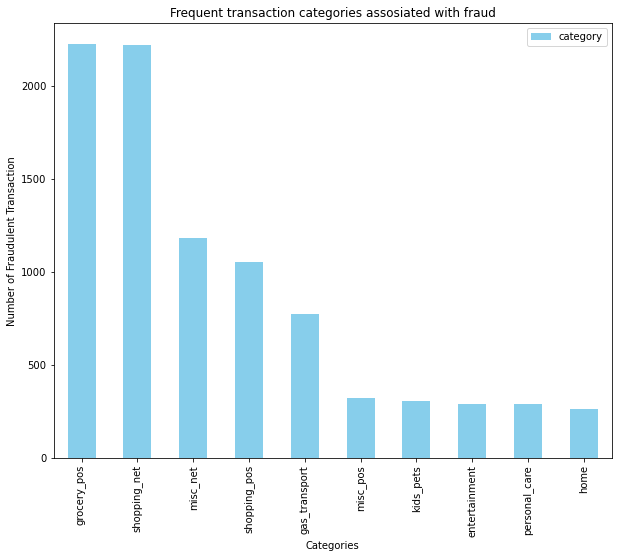

In [16]:
# Plot the Result
Frequent_tans_categries.plot(kind = 'bar',color = 'skyblue', figsize = (10,8))
plt.xlabel('Categories')
plt.ylabel('Number of Fraudulent Transaction')
plt.title('Frequent transaction categories assosiated with fraud')
plt.xticks(rotation=90)
plt.legend()
plt.show()

### Top10 most frequent merchants for fraud Transaction

In [18]:
# Filter the fraud Transaction
fraud_data = dfcredit[dfcredit['is_fraud'] == 1]

In [33]:
#Group by Merchants and count with the most frequent fraud transaction 
merchant_fraud_count = fraud_data['merchant'].value_counts()

In [34]:
merchant_fraud_count

fraud_Kilback LLC                      62
fraud_Rau and Sons                     60
fraud_Kozey-Boehm                      60
fraud_Doyle Ltd                        57
fraud_Terry-Huel                       56
                                       ..
fraud_Reichel, Bradtke and Blanda       1
fraud_Prosacco, Kreiger and Kovacek     1
fraud_Morar Inc                         1
fraud_Windler LLC                       1
fraud_Hackett Group                     1
Name: merchant, Length: 685, dtype: int64

In [35]:
#Get the top10 most frequent merchants for fraud transaction
frequent_merchant = merchant_fraud_count.head(10)

In [36]:
frequent_merchant

fraud_Kilback LLC                      62
fraud_Rau and Sons                     60
fraud_Kozey-Boehm                      60
fraud_Doyle Ltd                        57
fraud_Terry-Huel                       56
fraud_Boyer PLC                        55
fraud_Kuhn LLC                         55
fraud_Moen, Reinger and Murphy         53
fraud_Kiehn-Emmerich                   53
fraud_Mosciski, Ziemann and Farrell    53
Name: merchant, dtype: int64

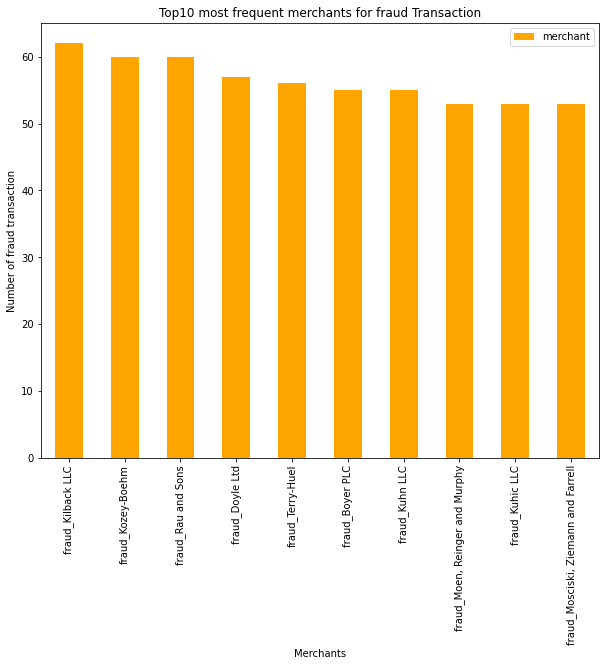

In [23]:
# Plot the result
frequent_merchant.plot(kind = 'bar', color = 'orange', figsize=(10,8))
plt.xlabel('Merchants')
plt.ylabel('Number of fraud transaction')
plt.title('Top10 most frequent merchants for fraud Transaction')
plt.xticks(rotation = 90)
plt.legend()
plt.show()


### Avarage Amount Spent By Each Gender

In [37]:
#to get average amount,groupby gender
avg_amt_spent = dfcredit.groupby('gender')['amt'].mean()

In [38]:
avg_amt_spent

gender
F    271.712988
M    330.507216
Name: amt, dtype: float64

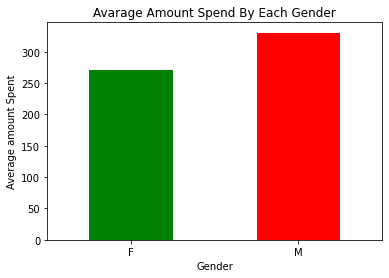

In [32]:
#Plot the Result
avg_amt_spent.plot(kind='bar',color = ['green','red'], figsize =(6,4))
plt.title('Avarage Amount Spend By Each Gender')
plt.xlabel('Gender')
plt.ylabel('Average amount Spent')
plt.xticks(rotation=0)
plt.show()


### Top5 Merchant With Highest Average Transaction

In [8]:
#Group by merchant and calculate the average transaction amount
merchant_avg = dfcredit.groupby('merchant')['amt'].mean()

In [11]:
merchant_avg

merchant
fraud_Abbott-Rogahn                 163.065000
fraud_Abbott-Steuber                 31.228500
fraud_Abernathy and Sons             76.960556
fraud_Abshire PLC                   262.755789
fraud_Adams, Kovacek and Kuhlman     35.533077
                                       ...    
fraud_Zemlak Group                  621.918710
fraud_Zemlak, Tillman and Cremin     63.723571
fraud_Ziemann-Waters                 32.346800
fraud_Zieme, Bode and Dooley         43.162222
fraud_Zulauf LLC                     58.856667
Name: amt, Length: 693, dtype: float64

In [9]:
#Sort by Transaction amount in decending order
top5_merchants = merchant_avg.sort_values(ascending = False).head(5)

In [12]:
top5_merchants 

merchant
fraud_Bashirian Group                  891.065510
fraud_Kuhic LLC                        869.522344
fraud_Schmidt and Sons                 852.231111
fraud_Heathcote, Yost and Kertzmann    838.580323
fraud_Kozey-Boehm                      832.279865
Name: amt, dtype: float64

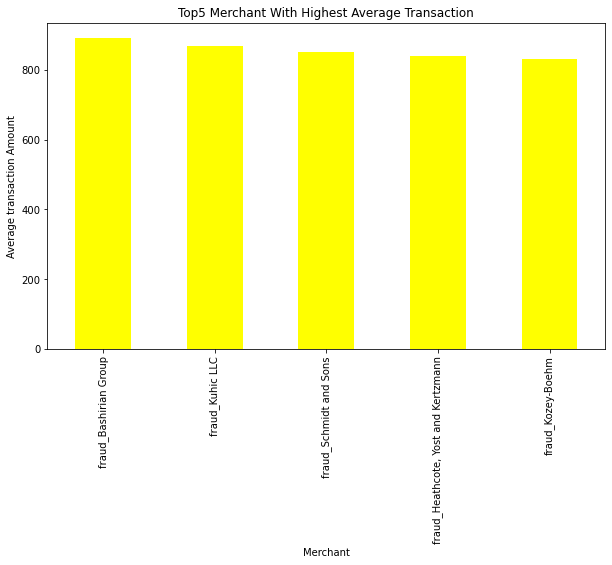

In [19]:
#Plot The Result
top5_merchants.plot(kind = 'bar', color = 'yellow',figsize=(10,6))
plt.title('Top5 Merchant With Highest Average Transaction')
plt.xlabel('Merchant')
plt.ylabel('Average transaction Amount')
plt.xticks(rotation=90)
plt.show()

## top 5 states with the highest number of transactions

In [5]:
#Group By State And Count Transaction
state_count = dfcredit['state'].value_counts()

In [7]:
#Get the top5 states
Top5_states = state_count.head(5)

In [8]:
Top5_states

NY    1290
TX    1287
PA    1153
CA     857
OH     687
Name: state, dtype: int64

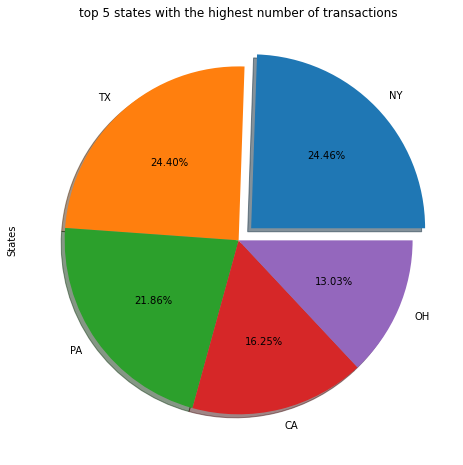

In [11]:
#Plot the Result
plt.figure(figsize=(8,8))
Top5_states.plot(kind = 'pie' , label = 'States' , autopct = '%.2f%%',explode = [0.1,0,0,0,0] , shadow = True)
plt.title('top 5 states with the highest number of transactions')
plt.show()

### Customer Age For fraudulent Transaction

In [34]:
#Parse transaction date & time and dob(convert dates into datetime objects)
dfcredit['trans_date_trans_time'] = pd.to_datetime(dfcredit['trans_date_trans_time'])
dfcredit['dob'] = pd.to_datetime(dfcredit['dob'])

In [35]:
dfcredit['trans_date_trans_time']

0       2019-08-11 19:38:33
1       2020-02-21 13:31:42
2       2019-09-03 02:39:49
3       2020-03-31 02:39:04
4       2020-12-05 07:58:57
                ...        
19297   2020-12-22 22:05:48
19298   2020-12-22 22:18:07
19299   2020-12-22 22:31:48
19300   2020-12-22 23:06:03
19301   2020-12-22 23:13:39
Name: trans_date_trans_time, Length: 19302, dtype: datetime64[ns]

In [36]:
dfcredit['dob']

0       1977-08-12
1       1999-06-06
2       1967-08-02
3       1948-04-11
4       1961-12-14
           ...    
19297   1959-03-03
19298   1959-03-03
19299   1959-03-03
19300   1959-03-03
19301   1959-03-03
Name: dob, Length: 19302, dtype: datetime64[ns]

In [37]:
#Calculate the Age
dfcredit['Age'] = dfcredit['trans_date_trans_time'].dt.year - dfcredit['dob'].dt.year - (
                   (dfcredit['trans_date_trans_time'].dt.month < dfcredit['dob'].dt.month) |
                        ((dfcredit['trans_date_trans_time'].dt.day) == dfcredit['dob'].dt.month) &
                       (dfcredit['trans_date_trans_time'].dt.month < dfcredit['dob'].dt.day))


In [38]:
 #Filter fraudulent transactions
fraud_ages = dfcredit[dfcredit['is_fraud'] == 1]['Age']

In [39]:
fraud_ages

9651     30
9652     58
9653     58
9654     30
9655     58
         ..
19297    61
19298    61
19299    61
19300    61
19301    61
Name: Age, Length: 9651, dtype: int64

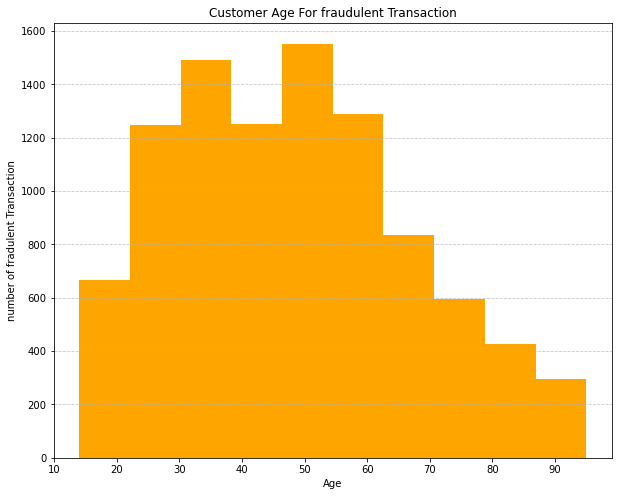

In [33]:
#plot the Result
plt.figure(figsize=(10,8))
plt.hist(fraud_ages,bins = 10,color = 'orange',)
plt.title("Customer Age For fraudulent Transaction")
plt.xlabel("Age")
plt.ylabel("number of fradulent Transaction")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Distribution of transaction over the month

In [7]:
#Convert transaction date & time to DateTime object
dfcredit['trans_date_trans_time'] = pd.to_datetime(dfcredit['trans_date_trans_time'])

In [8]:
#Extract the day of month
dfcredit['day_of_month'] = dfcredit['trans_date_trans_time'].dt.day

In [9]:
dfcredit['day_of_month']

0        11
1        21
2         3
3        31
4         5
         ..
19297    22
19298    22
19299    22
19300    22
19301    22
Name: day_of_month, Length: 19302, dtype: int64

In [13]:
#Count the transaction per day
transaction_per_day = dfcredit['day_of_month'].value_counts().sort_index()

In [20]:
transaction_per_day

1     605
2     634
3     654
4     609
5     615
6     551
7     632
8     709
9     559
10    621
11    670
12    691
13    596
14    683
15    602
16    577
17    648
18    588
19    677
20    731
21    585
22    627
23    615
24    634
25    662
26    608
27    635
28    656
29    637
30    600
31    391
Name: day_of_month, dtype: int64

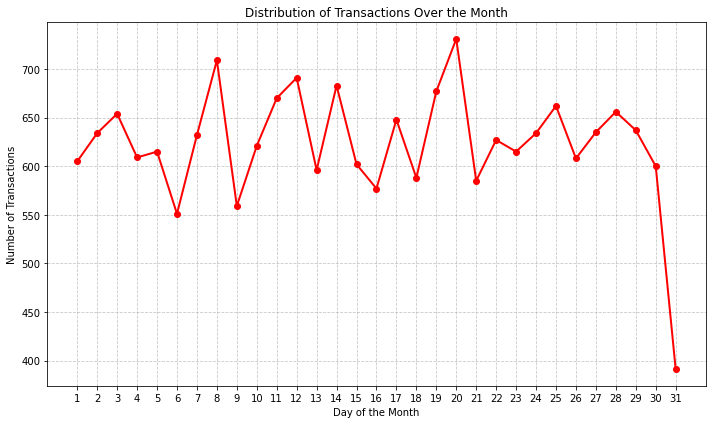

In [19]:
#plot the result
plt.figure(figsize=(10, 6))
transaction_per_day.sort_index().plot(kind='line', marker='o', color='red', linewidth=2)
plt.title('Distribution of Transactions Over the Month')
plt.xlabel('Day of the Month')
plt.ylabel('Number of Transactions')
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.xticks(range(1, 32))  # Adjust for 31 days
plt.tight_layout()
plt.show()


### Average Spending Amount By Age Group

In [6]:
#Convert dob to datetime format
dfcredit['dob'] = pd.to_datetime(dfcredit['dob'])

In [8]:
#Calculate Age
current_year = datetime.now().year
dfcredit['Age'] = current_year - dfcredit['dob'].dt.year

In [9]:
dfcredit['Age'] 

0        48
1        26
2        58
3        77
4        64
         ..
19297    66
19298    66
19299    66
19300    66
19301    66
Name: Age, Length: 19302, dtype: int64

In [13]:
#Define age bins and labels
bins = [18,25,35,45,55,65,75,100]
labels = ['18-25','26-35','36-45','46-55','56-65','66-75','76+']

In [14]:
#Create Age Group
dfcredit['Age_group'] = pd.cut(dfcredit['Age'],bins = bins,labels = labels,right = False)

In [15]:
dfcredit['Age_group']

0        46-55
1        26-35
2        56-65
3          76+
4        56-65
         ...  
19297    66-75
19298    66-75
19299    66-75
19300    66-75
19301    66-75
Name: Age_group, Length: 19302, dtype: category
Categories (7, object): ['18-25' < '26-35' < '36-45' < '46-55' < '56-65' < '66-75' < '76+']

In [17]:
#Calculate Average Spending per Age Group
Age_group_spending = dfcredit.groupby('Age_group')['amt'].mean()

In [18]:
Age_group_spending

Age_group
18-25    322.235019
26-35    306.012368
36-45    261.933210
46-55    237.875050
56-65    348.391822
66-75    327.236276
76+      354.075453
Name: amt, dtype: float64

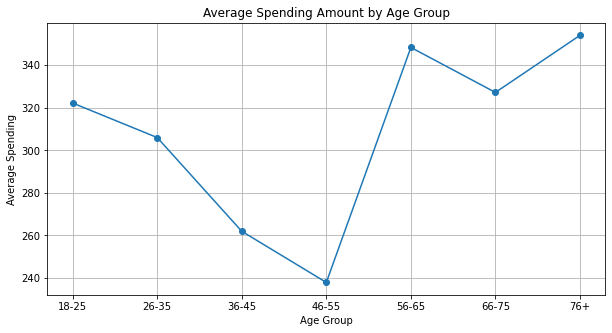

In [22]:
#Plot The Result
plt.figure(figsize=(10, 5))
Age_group_spending.plot(kind='line', marker='o', linestyle='-')
plt.title('Average Spending Amount by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Spending')
plt.grid(True)
plt.show()